<a href="https://colab.research.google.com/github/ping-Mel/ERV-V2-Assignments/blob/main/session7/s7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Models:
    """
    In this class, we organize our neural network architectures as nested/inner classes.
    This approach groups related functionalities and creates an organized and encapsulated
    code structure. Each neural network architecture is defined as an inner class within
    this Models class. This allows for easy instantiation and clear hierarchy of neural
    network models, each with its distinct architecture and characteristics.
    """
    @staticmethod
    def evaluate_model(model_class, input_size=(1, 28, 28)):
        """
        Static method to evaluate the model architecture.
        This method will print a summary of the model showing the layers and parameters.

        Parameters:
        model_class (class): The inner class representing the neural network architecture to evaluate.
        input_size (tuple): The size of the input to the model. Default is (1, 28, 28) for MNIST dataset.
        """
        # Check for CUDA availability and set the device accordingly
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda" if use_cuda else "cpu")

        # Initialize the model from the inner class and move to the appropriate device
        model = model_class().to(device)

        # Print the summary of the model
        summary(model, input_size=input_size)



    class NetA(nn.Module):
        """
        Inner class representing an initial neural network architecture.
        """
        def __init__(self):
            super(Models.NetA, self).__init__()
            # Convolutional layers
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 1    28      1   1    3      28     1    1  3
            self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 3    28      1   1    5      28     1    1  3
            self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5    28      1   2    6      14     2    0  2
            self.pool1 = nn.MaxPool2d(2, 2)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 6    14      2   1    10     14     2    1  3
            self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 10    14     2   1    14     14     2    1  3
            self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 14    14     2   2    16     7     4     0  2
            self.pool2 = nn.MaxPool2d(2, 2)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 16    7      4   1    24     5     4     0  3
            self.conv5 = nn.Conv2d(256, 512, 3)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 24    5     4    1    32     3     4     0  3
            self.conv6 = nn.Conv2d(512, 1024, 3)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 32    3      4   1    40     1     4     0  3
            self.conv7 = nn.Conv2d(1024, 10, 3)

        def forward(self, x):
            x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
            x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
            x = F.relu(self.conv6(F.relu(self.conv5(x))))
            x = self.conv7(x)
            x = x.view(-1, 10) #1x1x10> 10
            return F.log_softmax(x, dim=-1)

    class NetB(nn.Module):
        """
        Inner class representing a simple neural network architecture with reduced the channel size.
        """
        def __init__(self):
            super(Models.NetB, self).__init__()
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 1    28      1   1    3      26     1    0  3
            self.convblock1 = nn.Sequential(
              nn.Conv2d(1, 16, 3),
              nn.ReLU()
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 3    26      1   1    5      24     1    0  3
            self.convblock2 = nn.Sequential(
              nn.Conv2d(16, 32 , 3),
              nn.ReLU()
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5    24      1   2    6      12     2    0  2
            self.pool1 = nn.MaxPool2d(2, 2)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 6    12      2   1    10       10     2    0  3
            self.convblock3 = nn.Sequential(
              nn.Conv2d(32, 64 , 3),
              nn.ReLU()
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 10    10      2   2    14    5     4     0  2
            self.pool2 = nn.MaxPool2d(2, 2)
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 14    5      4   1    22    3     4     0  3
            self.convblock4 = nn.Sequential(
              nn.Conv2d(64, 32 , 3),
              nn.ReLU()
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 22    3      4   1    30    1     4     0  3
            self.convblock5 = nn.Sequential(
              nn.Conv2d(32, 10 , 3),
            )


        def forward(self, x):
          x = self.convblock1(x)
          x = self.convblock2(x)
          x = self.pool1(x)
          x = self.convblock3(x)
          x = self.pool2(x)
          x = self.convblock4(x)
          x = self.convblock5(x)
          x = x.view(-1, 10)
          return F.log_softmax(x, dim=-1)

    class NetC(nn.Module):
        """
        Inner class representing a simple neural network architecture with reduced the channel size.
        """
        def __init__(self):
            super(Models.NetC, self).__init__()

            self.convblock1 = nn.Sequential(
              nn.Conv2d(1, 10, 3, padding=1),
              nn.BatchNorm2d(10),
              nn.ReLU(),
              nn.Dropout(0.25)
            )

            self.convblock2 = nn.Sequential(
              nn.Conv2d(10, 20 , 3, padding=1),
              nn.BatchNorm2d(20),
              nn.ReLU(),
              nn.Dropout(0.25)
            )

            self.pool1 = nn.MaxPool2d(2, 2)

            self.convblock3 = nn.Sequential(
              nn.Conv2d(20, 10 , 3, padding=1),
              nn.BatchNorm2d(10),
              nn.ReLU(),
              nn.Dropout(0.25)
            )

            self.pool2 = nn.MaxPool2d(2, 2)

            self.convblock4 = nn.Sequential(
              nn.Conv2d(10, 10 , 3),
              nn.BatchNorm2d(10),
              nn.ReLU()
            )

            self.convblock5 = nn.Sequential(
              nn.Conv2d(10, 10 , 3),
              nn.AdaptiveAvgPool2d(1)
            )


        def forward(self, x):
          x = self.convblock1(x)
          x = self.convblock2(x)
          x = self.pool1(x)
          x = self.convblock3(x)
          x = self.pool2(x)
          x = self.convblock4(x)
          x = self.convblock5(x)
          x = x.view(-1, 10)
          return F.log_softmax(x, dim=-1)

# Target 1: Inital Model Setup and First Evaluation

## Initial Setup
- Construct the **basic skeleton** of the neural network model. This includes defining the layers and forward pass logic in Class Models (model.py) NetA inner class.
- Ensure that the code is functional and can execute without errors.

## Aim
1.   **99.4%** (this must be consistently shown in your last few epochs, and not a one-time achievement)
2.   Less than or equal to **15** Epochs
3.   Less than **8000** Parameters

In [2]:
!pip install torchsummary

from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [4]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 78586044.80it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85668807.51it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34766500.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1756618.60it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}%')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))


# Result 1: Inital Model Setup and First Evaluation

## Model Evaluation
- Assess the **model parameters** using static method **evaluate_model** in Class **Models** to understand the complexity and capacity of the network.

## Training and Testing
- Train the model with the training dataset and validate its performance on a separate validation set.
- Evaluate the **accuracy** of the model using the test dataset to ensure that it meets the preliminary performance benchmarks.

## Result Capture
- Record the performance metrics such as loss and accuracy for both training and validation phases.


> **Parameter**:6,379,786

> **Best Training Accuracy**: EPOCH:14 (**99.96%**)

> **Best Test Accuracy**: EPOCH:14 (**99.24%**)



In [25]:
Models.evaluate_model(Models.NetA)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

In [18]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetA().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.03761669248342514 Batch_id=468 Accuracy=87.55%: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]



Test set: Average loss: 0.0704, Accuracy: 9773/10000 (97.73%)

EPOCH: 1


Loss=0.038250882178545 Batch_id=468 Accuracy=98.24%: 100%|██████████| 469/469 [00:22<00:00, 20.91it/s]



Test set: Average loss: 0.0359, Accuracy: 9875/10000 (98.75%)

EPOCH: 2


Loss=0.09250428527593613 Batch_id=468 Accuracy=98.86%: 100%|██████████| 469/469 [00:23<00:00, 19.79it/s]



Test set: Average loss: 0.0352, Accuracy: 9879/10000 (98.79%)

EPOCH: 3


Loss=0.0018328595906496048 Batch_id=468 Accuracy=99.21%: 100%|██████████| 469/469 [00:22<00:00, 20.52it/s]



Test set: Average loss: 0.0260, Accuracy: 9909/10000 (99.09%)

EPOCH: 4


Loss=0.004556652158498764 Batch_id=468 Accuracy=99.39%: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]



Test set: Average loss: 0.0278, Accuracy: 9905/10000 (99.05%)

EPOCH: 5


Loss=0.04073157534003258 Batch_id=468 Accuracy=99.59%: 100%|██████████| 469/469 [00:21<00:00, 22.18it/s]



Test set: Average loss: 0.0286, Accuracy: 9915/10000 (99.15%)

EPOCH: 6


Loss=0.0017468458972871304 Batch_id=468 Accuracy=99.68%: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]



Test set: Average loss: 0.0297, Accuracy: 9914/10000 (99.14%)

EPOCH: 7


Loss=0.15875424444675446 Batch_id=468 Accuracy=99.75%: 100%|██████████| 469/469 [00:21<00:00, 21.60it/s]



Test set: Average loss: 0.0334, Accuracy: 9908/10000 (99.08%)

EPOCH: 8


Loss=0.047380480915308 Batch_id=468 Accuracy=99.76%: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]



Test set: Average loss: 0.0271, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.0008249827078543603 Batch_id=468 Accuracy=99.77%: 100%|██████████| 469/469 [00:22<00:00, 21.07it/s]



Test set: Average loss: 0.0247, Accuracy: 9925/10000 (99.25%)

EPOCH: 10


Loss=0.0007086018449626863 Batch_id=468 Accuracy=99.85%: 100%|██████████| 469/469 [00:23<00:00, 19.69it/s]



Test set: Average loss: 0.0297, Accuracy: 9925/10000 (99.25%)

EPOCH: 11


Loss=0.00037964293733239174 Batch_id=468 Accuracy=99.89%: 100%|██████████| 469/469 [00:22<00:00, 20.91it/s]



Test set: Average loss: 0.0270, Accuracy: 9934/10000 (99.34%)

EPOCH: 12


Loss=0.004726060200482607 Batch_id=468 Accuracy=99.90%: 100%|██████████| 469/469 [00:21<00:00, 22.03it/s]



Test set: Average loss: 0.0316, Accuracy: 9926/10000 (99.26%)

EPOCH: 13


Loss=0.004295483231544495 Batch_id=468 Accuracy=99.93%: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]



Test set: Average loss: 0.0322, Accuracy: 9927/10000 (99.27%)

EPOCH: 14


Loss=0.00013004502397961915 Batch_id=468 Accuracy=99.96%: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]



Test set: Average loss: 0.0325, Accuracy: 9924/10000 (99.24%)



Text(0.5, 1.0, 'Test Accuracy')

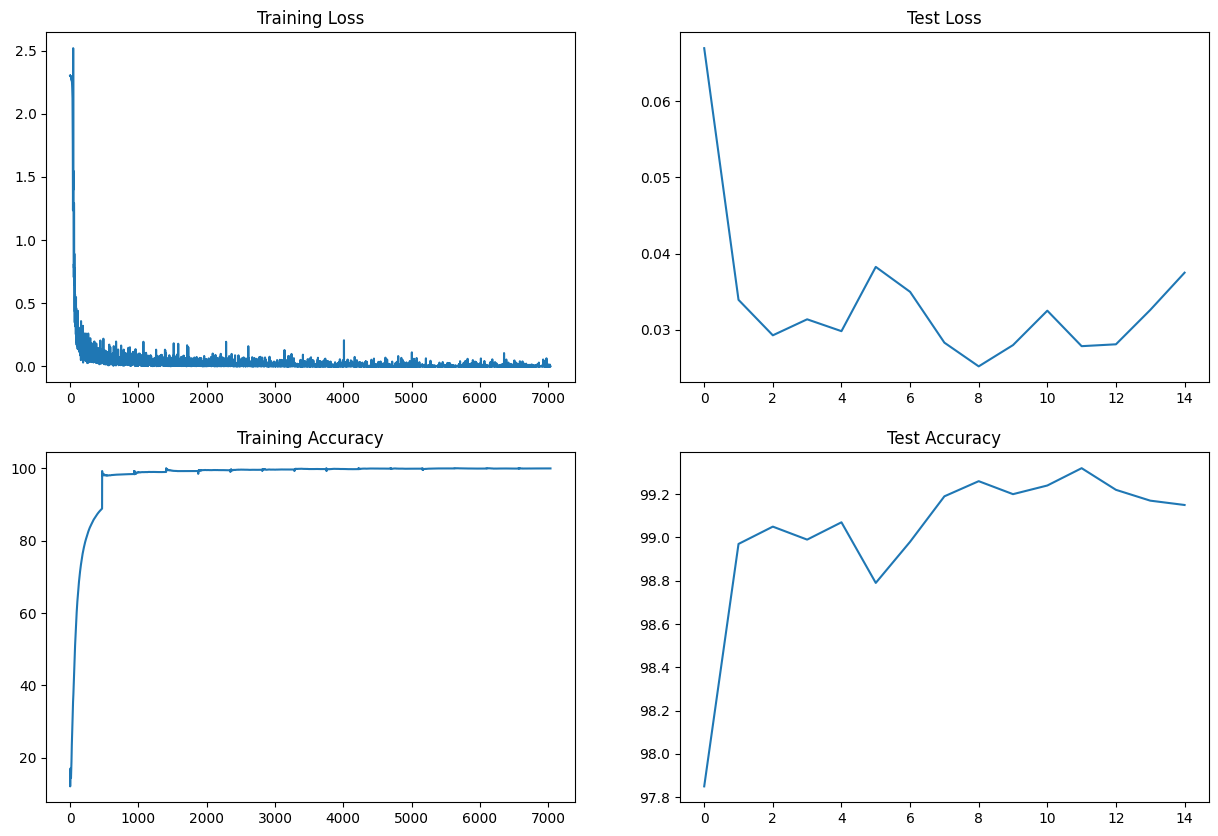

In [27]:
t = [t_items.item() for t_items in train_losses]

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# Analysis 1: Inital Model Setup and First Evaluation

## Analysis

1.   Given the MNIST dataset, which consists of 28x28 pixel grayscale images, it is very simple, does not required a very deep and complex network. in NetA archteicure, the last layers feature output uses 1024 channels, it will result large parameters (6 mil+ > required 8000)
2.   From the model training accuracy vs. testing accuracy, it appares the overfitting.

## Model Improvement Recommendations

1. **Simplify the Network Architecture to reduce complexity:** Streamline the model by minimizing the number of layers and parameters. This can enhance generalization and reduce the risk of overfitting.

2. **Manage Channel Expansion to control channel sizes:** Begin with a lower number of channels in the initial layers. Incrementally increase the number of channels in deeper layers only if necessary. A moderate number of channels can effectively capture the essential features in the MNIST dataset without leading to overfitting.

---
---
---




# Target 2: Simplify Model Architecture and Second Evaluation

*   Manage Channel Expansion, the simplified architecture is defined in Class Models (model.py) **NetB** inner class with reduced input channels and output channels.
*   Simplified the network architectures


## Aim
1.   **99.4%** (this must be consistently shown in your last few epochs, and not a one-time achievement)
2.   Less than or equal to **15** Epochs
3.   Less than **8000** Parameters





# Result 2: Simplify Model Architecture and Second Evaluation

## Result Capture
- Record the performance metrics such as loss and accuracy for both training and validation phases.


> **Parameter**: 44,650

> **Best Training Accuracy**: EPOCH:8 (**99.42%**)

> **Best Test Accuracy**: EPOCH:8 (**99.15%**)

In [16]:
Models.evaluate_model(Models.NetB)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,640
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
            Conv2d-6           [-1, 64, 10, 10]          18,496
              ReLU-7           [-1, 64, 10, 10]               0
         MaxPool2d-8             [-1, 64, 5, 5]               0
            Conv2d-9             [-1, 32, 3, 3]          18,464
             ReLU-10             [-1, 32, 3, 3]               0
           Conv2d-11             [-1, 10, 1, 1]           2,890
Total params: 44,650
Trainable params: 44,650
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [17]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetB().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.031161854043602943 Batch_id=468 Accuracy=89.04%: 100%|██████████| 469/469 [00:17<00:00, 26.53it/s]



Test set: Average loss: 0.0631, Accuracy: 9795/10000 (97.95%)

EPOCH: 1


Loss=0.12033449858427048 Batch_id=468 Accuracy=97.94%: 100%|██████████| 469/469 [00:19<00:00, 24.21it/s]



Test set: Average loss: 0.0508, Accuracy: 9852/10000 (98.52%)

EPOCH: 2


Loss=0.03883303329348564 Batch_id=468 Accuracy=98.54%: 100%|██████████| 469/469 [00:18<00:00, 24.96it/s]



Test set: Average loss: 0.0417, Accuracy: 9880/10000 (98.80%)

EPOCH: 3


Loss=0.0027813438791781664 Batch_id=468 Accuracy=98.80%: 100%|██████████| 469/469 [00:17<00:00, 26.85it/s]



Test set: Average loss: 0.0412, Accuracy: 9870/10000 (98.70%)

EPOCH: 4


Loss=0.02860967069864273 Batch_id=468 Accuracy=98.97%: 100%|██████████| 469/469 [00:17<00:00, 26.50it/s]



Test set: Average loss: 0.0361, Accuracy: 9893/10000 (98.93%)

EPOCH: 5


Loss=0.02320309914648533 Batch_id=468 Accuracy=99.14%: 100%|██████████| 469/469 [00:18<00:00, 25.63it/s]



Test set: Average loss: 0.0355, Accuracy: 9892/10000 (98.92%)

EPOCH: 6


Loss=0.006894409190863371 Batch_id=468 Accuracy=99.24%: 100%|██████████| 469/469 [00:19<00:00, 24.49it/s]



Test set: Average loss: 0.0354, Accuracy: 9882/10000 (98.82%)

EPOCH: 7


Loss=0.00782772433012724 Batch_id=468 Accuracy=99.37%: 100%|██████████| 469/469 [00:17<00:00, 26.49it/s]



Test set: Average loss: 0.0319, Accuracy: 9906/10000 (99.06%)

EPOCH: 8


Loss=0.005994472187012434 Batch_id=468 Accuracy=99.42%: 100%|██████████| 469/469 [00:18<00:00, 25.48it/s]



Test set: Average loss: 0.0305, Accuracy: 9915/10000 (99.15%)

EPOCH: 9


Loss=0.007736837491393089 Batch_id=468 Accuracy=99.46%: 100%|██████████| 469/469 [00:16<00:00, 27.60it/s]



Test set: Average loss: 0.0339, Accuracy: 9905/10000 (99.05%)

EPOCH: 10


Loss=0.013863920234143734 Batch_id=468 Accuracy=99.56%: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]



Test set: Average loss: 0.0327, Accuracy: 9910/10000 (99.10%)

EPOCH: 11


Loss=0.0020040825475007296 Batch_id=468 Accuracy=99.57%: 100%|██████████| 469/469 [00:17<00:00, 26.39it/s]



Test set: Average loss: 0.0342, Accuracy: 9905/10000 (99.05%)

EPOCH: 12


Loss=0.0010165638523176312 Batch_id=468 Accuracy=99.59%: 100%|██████████| 469/469 [00:17<00:00, 26.12it/s]



Test set: Average loss: 0.0407, Accuracy: 9895/10000 (98.95%)

EPOCH: 13


Loss=0.0014601144939661026 Batch_id=468 Accuracy=99.67%: 100%|██████████| 469/469 [00:17<00:00, 26.06it/s]



Test set: Average loss: 0.0346, Accuracy: 9904/10000 (99.04%)

EPOCH: 14


Loss=0.001348346471786499 Batch_id=468 Accuracy=99.69%: 100%|██████████| 469/469 [00:16<00:00, 27.90it/s]



Test set: Average loss: 0.0326, Accuracy: 9914/10000 (99.14%)



Text(0.5, 1.0, 'Test Accuracy')

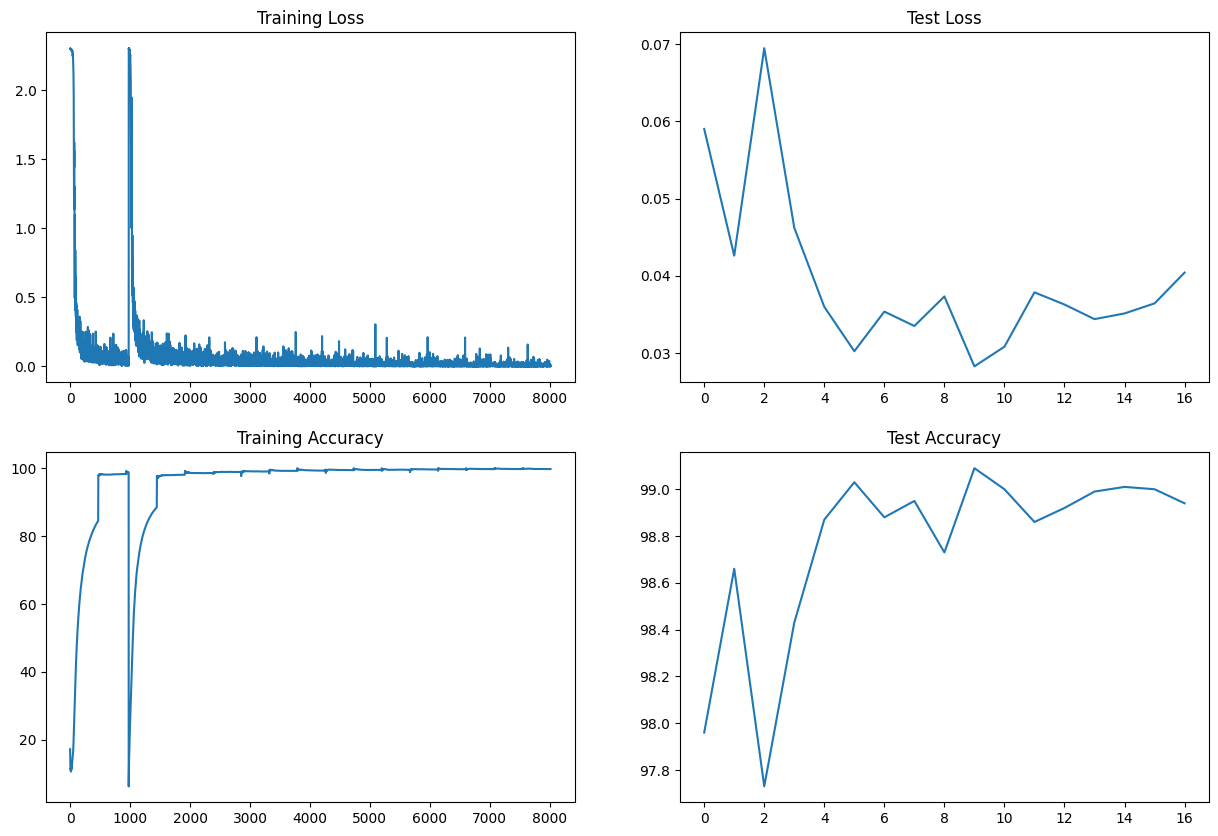

In [14]:
t = [t_items.item() for t_items in train_losses]

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# Analysis 2: Simplify Model Architecture and Second Evaluation

## Analysis

1. The streamlined network architecture effectively reduces complexity, trimming the parameter count significantly from 6 million to 45K. This simplification represents a substantial improvement in model efficiency.

2. The simplified model exhibits no signs of overfitting, indicating a well-balanced approach to learning. With additional epochs, it has the potential to achieve the targeted performance outcomes.

## Model Improvement Recommendations

1. Push further to reduce the channel size
2. apply batch normalization after each convolutional layer before the activation function.
3. To prevent overfitting, especially when training for more epochs or on datasets with limited diversity, include dropout layers after activation layers, 0.25 will be used.


---
---
---

# Target 3: Tune Model Architecture to ehnace performance, generalisation and Third Evaluation (**NetC**)

*   Batch Normalization
*   Dropout for Regularization
*   Include Padding in Convolutional Layers



## Aim
1.   **99.4%** (this must be consistently shown in your last few epochs, and not a one-time achievement)
2.   Less than or equal to **15** Epochs
3.   Less than **8000** Parameters



# Result 3: Tune Model Architecture to ehnace performance, generalisation and Third Evaluation (NetC)

## Result Capture
- Record the performance metrics such as loss and accuracy for both training and validation phases.


> **Parameter**: 5650 < 8k

> **Best Training Accuracy**: EPOCH:12 (**98.59%**)

> **Best Test Accuracy**: EPOCH:12 (**98.61%**)

In [7]:
Models.evaluate_model(Models.NetC)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 20, 28, 28]           1,820
       BatchNorm2d-6           [-1, 20, 28, 28]              40
              ReLU-7           [-1, 20, 28, 28]               0
           Dropout-8           [-1, 20, 28, 28]               0
         MaxPool2d-9           [-1, 20, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]           1,810
      BatchNorm2d-11           [-1, 10, 14, 14]              20
             ReLU-12           [-1, 10, 14, 14]               0
          Dropout-13           [-1, 10, 14, 14]               0
        MaxPool2d-14             [-1, 1

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetC().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.2551780939102173 Batch_id=468 Accuracy=84.31%: 100%|██████████| 469/469 [00:16<00:00, 27.78it/s]



Test set: Average loss: 0.3021, Accuracy: 9450/10000 (94.50%)

EPOCH: 1


Loss=0.13949216902256012 Batch_id=468 Accuracy=96.49%: 100%|██████████| 469/469 [00:17<00:00, 26.41it/s]



Test set: Average loss: 0.1692, Accuracy: 9713/10000 (97.13%)

EPOCH: 2


Loss=0.11397048085927963 Batch_id=468 Accuracy=97.27%: 100%|██████████| 469/469 [00:16<00:00, 28.95it/s]



Test set: Average loss: 0.1380, Accuracy: 9728/10000 (97.28%)

EPOCH: 3


Loss=0.044262152165174484 Batch_id=468 Accuracy=97.69%: 100%|██████████| 469/469 [00:16<00:00, 29.15it/s]



Test set: Average loss: 0.1001, Accuracy: 9794/10000 (97.94%)

EPOCH: 4


Loss=0.16977526247501373 Batch_id=468 Accuracy=97.90%: 100%|██████████| 469/469 [00:16<00:00, 28.25it/s]



Test set: Average loss: 0.0976, Accuracy: 9789/10000 (97.89%)

EPOCH: 5


Loss=0.06621644645929337 Batch_id=468 Accuracy=98.03%: 100%|██████████| 469/469 [00:16<00:00, 28.88it/s]



Test set: Average loss: 0.1133, Accuracy: 9736/10000 (97.36%)

EPOCH: 6


Loss=0.07339203357696533 Batch_id=468 Accuracy=98.19%: 100%|██████████| 469/469 [00:16<00:00, 28.08it/s]



Test set: Average loss: 0.1045, Accuracy: 9739/10000 (97.39%)

EPOCH: 7


Loss=0.031861793249845505 Batch_id=468 Accuracy=98.36%: 100%|██████████| 469/469 [00:17<00:00, 27.46it/s]



Test set: Average loss: 0.0755, Accuracy: 9832/10000 (98.32%)

EPOCH: 8


Loss=0.03924413397908211 Batch_id=468 Accuracy=98.35%: 100%|██████████| 469/469 [00:16<00:00, 28.14it/s]



Test set: Average loss: 0.0778, Accuracy: 9832/10000 (98.32%)

EPOCH: 9


Loss=0.02377300150692463 Batch_id=468 Accuracy=98.44%: 100%|██████████| 469/469 [00:16<00:00, 29.16it/s]



Test set: Average loss: 0.0655, Accuracy: 9845/10000 (98.45%)

EPOCH: 10


Loss=0.06138600781559944 Batch_id=468 Accuracy=98.47%: 100%|██████████| 469/469 [00:15<00:00, 29.65it/s]



Test set: Average loss: 0.0748, Accuracy: 9822/10000 (98.22%)

EPOCH: 11


Loss=0.024509573355317116 Batch_id=468 Accuracy=98.50%: 100%|██████████| 469/469 [00:15<00:00, 30.39it/s]



Test set: Average loss: 0.0641, Accuracy: 9850/10000 (98.50%)

EPOCH: 12


Loss=0.05318706855177879 Batch_id=468 Accuracy=98.59%: 100%|██████████| 469/469 [00:15<00:00, 30.06it/s]



Test set: Average loss: 0.0595, Accuracy: 9861/10000 (98.61%)

EPOCH: 13


Loss=0.05101310834288597 Batch_id=468 Accuracy=98.63%: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]



Test set: Average loss: 0.0625, Accuracy: 9829/10000 (98.29%)

EPOCH: 14


Loss=0.009602400474250317 Batch_id=468 Accuracy=98.62%: 100%|██████████| 469/469 [00:17<00:00, 27.37it/s]



Test set: Average loss: 0.0556, Accuracy: 9872/10000 (98.72%)



# Analysis 3: Tune Model Architecture to ehnace performance, generalisation and Third Evaluation (NetC)

## Analysis

1. The revised model successfully meets the goal of having fewer than 8,000 parameters.

2. Without showing signs of overfitting, the revised model achieves an impressive accuracy of 98.62% in fewer than 15 epochs. Through meticulous tuning and refinements, reaching the target accuracy of 99.4% is within reach

## Model Improvement Recommendations

1. Augmenting the dataset can help the model generalize better to unseen data. Techniques like slight rotations, translations, scaling.
2.

In [ ]:
transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])